In [1]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [9]:
path = r"C:\Users\sureh\OneDrive\문서\GitHub\UOM-AI-Sessions\UOM-AI-Sessions\UOM-AI-Sessions\UOM-AI-Sessions\Session_1"

In [10]:
csv_file = path + "\\housing.csv"
df = pd.read_csv(csv_file)

df.sample(5)

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
240,4585000,3840,3,1,2,yes,no,no,no,no,1,yes,semi-furnished
55,7350000,6000,3,1,2,yes,no,no,no,yes,1,no,unfurnished
42,7700000,6480,3,2,4,yes,no,no,no,yes,2,no,unfurnished
26,8463000,6000,3,2,4,yes,yes,yes,no,yes,0,yes,semi-furnished
415,3395000,4785,3,1,2,yes,yes,yes,no,yes,1,no,furnished


In [11]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [12]:
df.describe().corr()

,price,area,bedrooms,bathrooms,stories,parking
price,1.000000,0.996090,-0.431419,-0.433847,-0.434208,-0.434661
area,0.996090,1.000000,-0.362182,-0.364599,-0.364995,-0.365360
bedrooms,-0.431419,-0.362182,1.000000,0.999992,0.999994,0.999985
bathrooms,-0.433847,-0.364599,0.999992,1.000000,0.999998,0.999997
stories,-0.434208,-0.364995,0.999994,0.999998,1.000000,0.999996
parking,-0.434661,-0.365360,0.999985,0.999997,0.999996,1.000000


In [13]:
cdf=df.drop(['bathrooms','stories','parking','bedrooms',],axis=1)

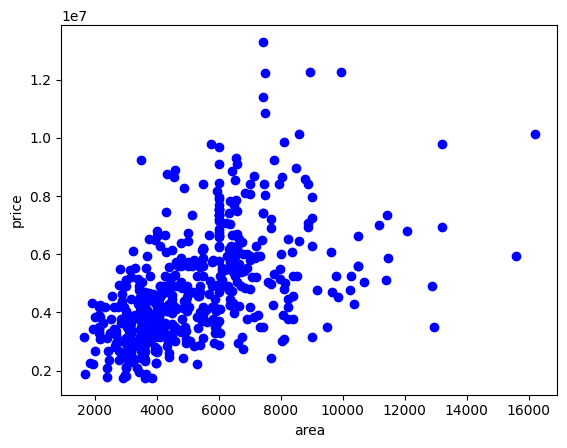

In [14]:
plt.scatter(cdf.area, cdf.price,  color='blue')
plt.xlabel("area")
plt.ylabel("price")
plt.show()

In [15]:
X = cdf.area.to_numpy()
y = cdf.price.to_numpy()

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [17]:
type(X_train), np.shape(X_train), np.shape(X_train)

(numpy.ndarray, (436,), (436,))

In [18]:
from sklearn import linear_model

regressor = linear_model.LinearRegression()

regressor.fit(X_train.reshape(-1, 1), y_train)

print ('Coefficients: ', regressor.coef_[0]) 
print ('Intercept: ',regressor.intercept_)

Coefficients:  425.72984193878284
Intercept:  2512254.2639593435


Text(0, 0.5, 'price')

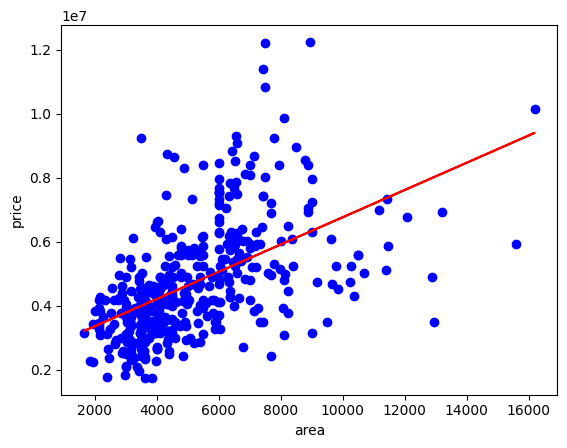

In [19]:
plt.scatter(X_train, y_train,  color='blue')
plt.plot(X_train, regressor.coef_ * X_train + regressor.intercept_, '-r')
plt.xlabel("area")
plt.ylabel("price")

In [20]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
y_test_ = regressor.predict(X_test.reshape(-1,1))

mae = mean_absolute_error(y_test, y_test_)
mse = mean_squared_error(y_test, y_test_)
r2 = r2_score(y_test, y_test_)

print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Absolute Error: 1474748.1337969352
Mean Squared Error: 3675286604768.185
R^2 Score: 0.27287851871974644
